In [1]:
%matplotlib inline

import ipystata

Terminated 1 unattached Stata session(s).


In [2]:
%%stata 
cap log close
log using "ECON_501_stata_lab7.log", replace
cap log off
cap log on

In [3]:
%%stata 
insheet using http://people.stern.nyu.edu/wgreene/Text/Edition7/TableF5-2.csv, clear

sum year qtr

In [4]:
%%stata 
*First, let STATA know you are using time series data
generate time=q(1950q1)+_n-1
format time %tq
sort time
tsset time

In [23]:
%%stata 

********************************
gen dp= infl-L.infl
*gen dy= log(realgdp)-log(L.realgdp)
sum realgdp infl unemp



(1 missing value generated)

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     realgdp |        204    4562.646    2113.962     1610.5     9303.9
        infl |        204    3.919431    3.401657    -2.5301    16.8643
       unemp |        204     5.67451    1.575251        2.6       10.7



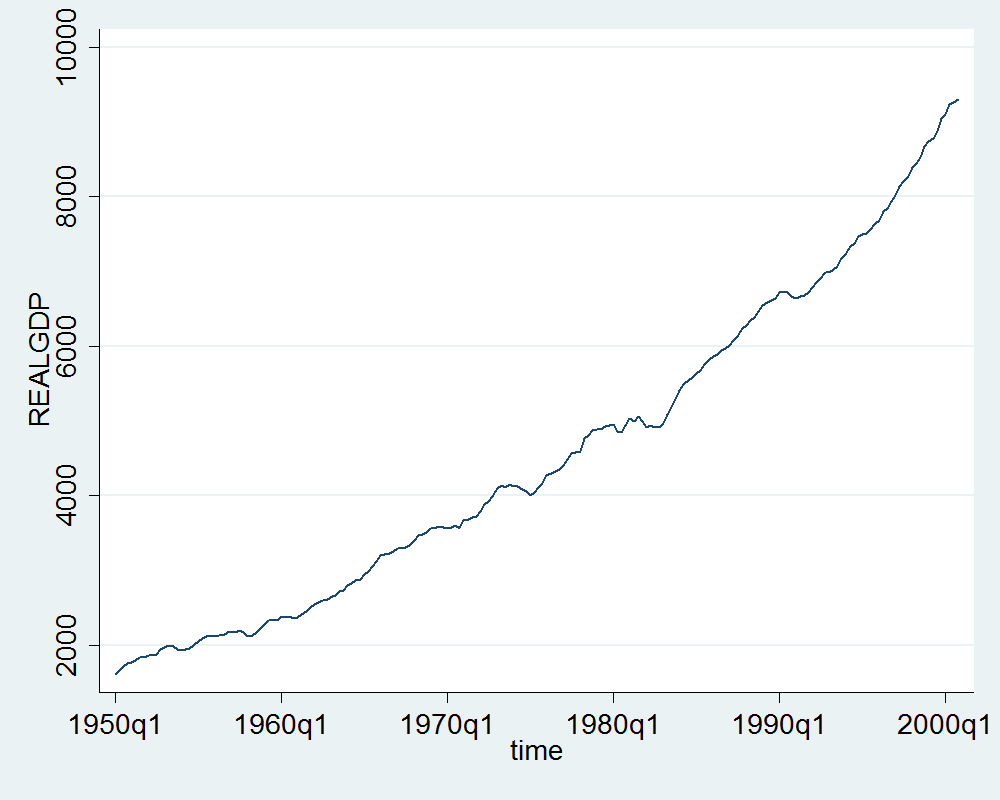

In [7]:
%%stata --graph
* plot
twoway (line realgdp time)

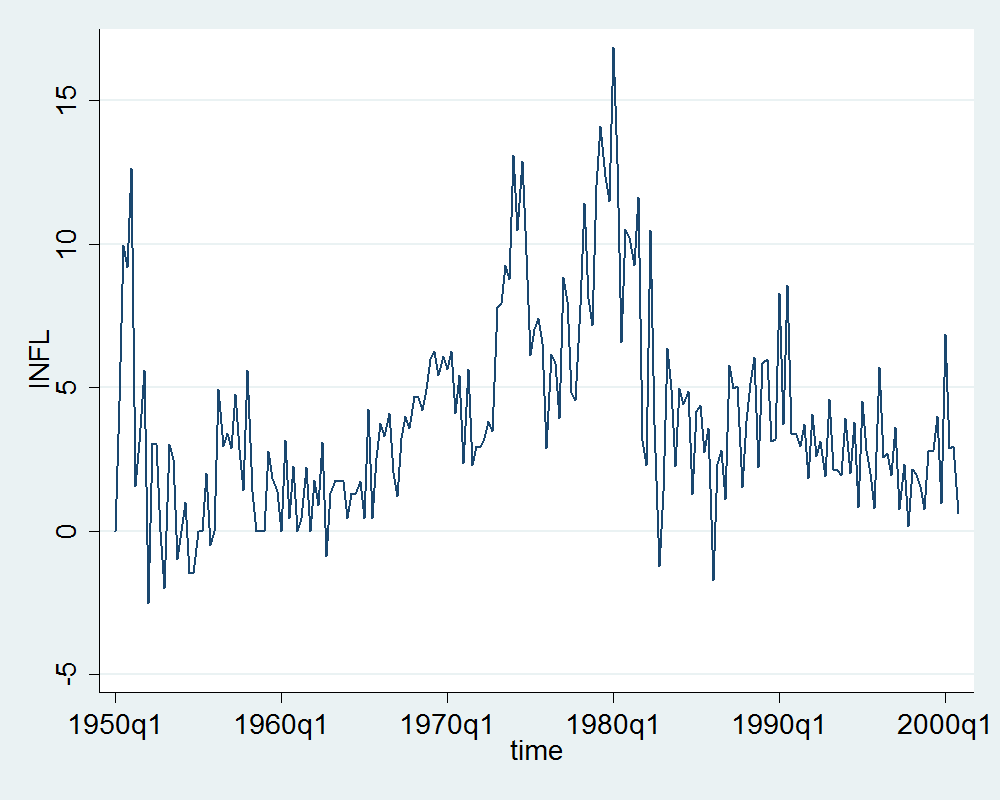

In [8]:
%%stata --graph
twoway (line infl time)


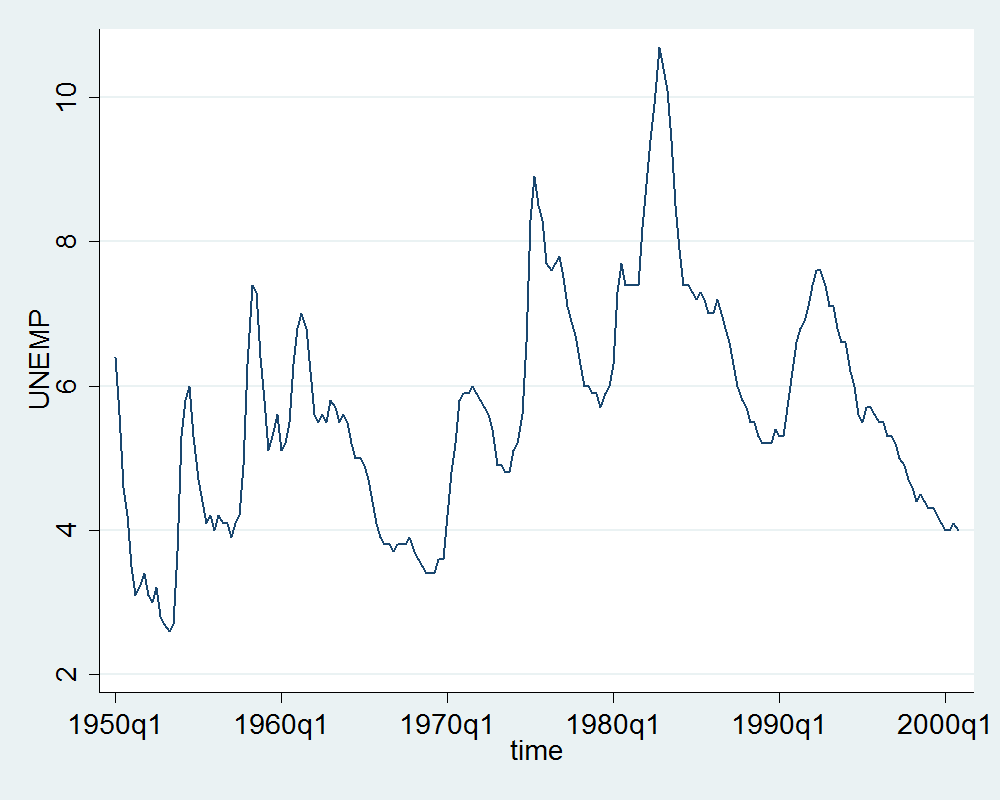

In [9]:
%%stata --graph
twoway (line unemp time)


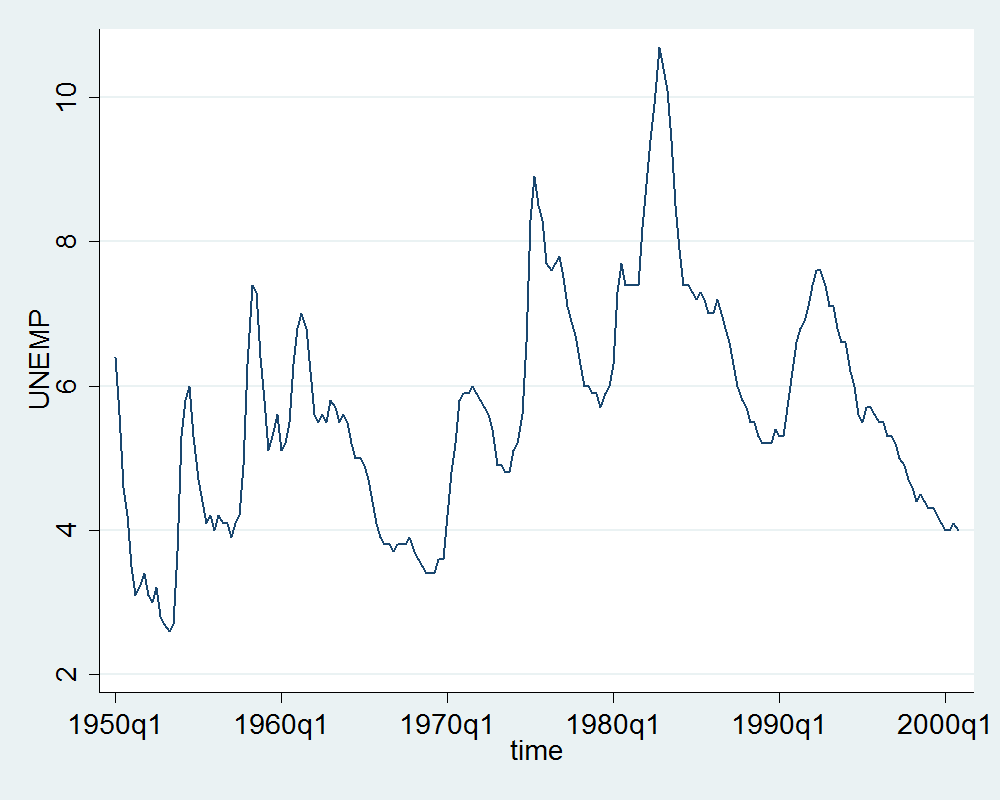

In [10]:
%%stata --graph
tsline unemp

In [25]:
%%stata 
* CORR
corr realgdp L.realgdp unemp L.unemp 


(obs=203)

             |                 L.                L.
             |  realgdp  realgdp    unemp    unemp
-------------+------------------------------------
     realgdp |
         --. |   1.0000
         L1. |   0.9998   1.0000
       unemp |
         --. |   0.2281   0.2293   1.0000
         L1. |   0.2408   0.2391   0.9686   1.0000



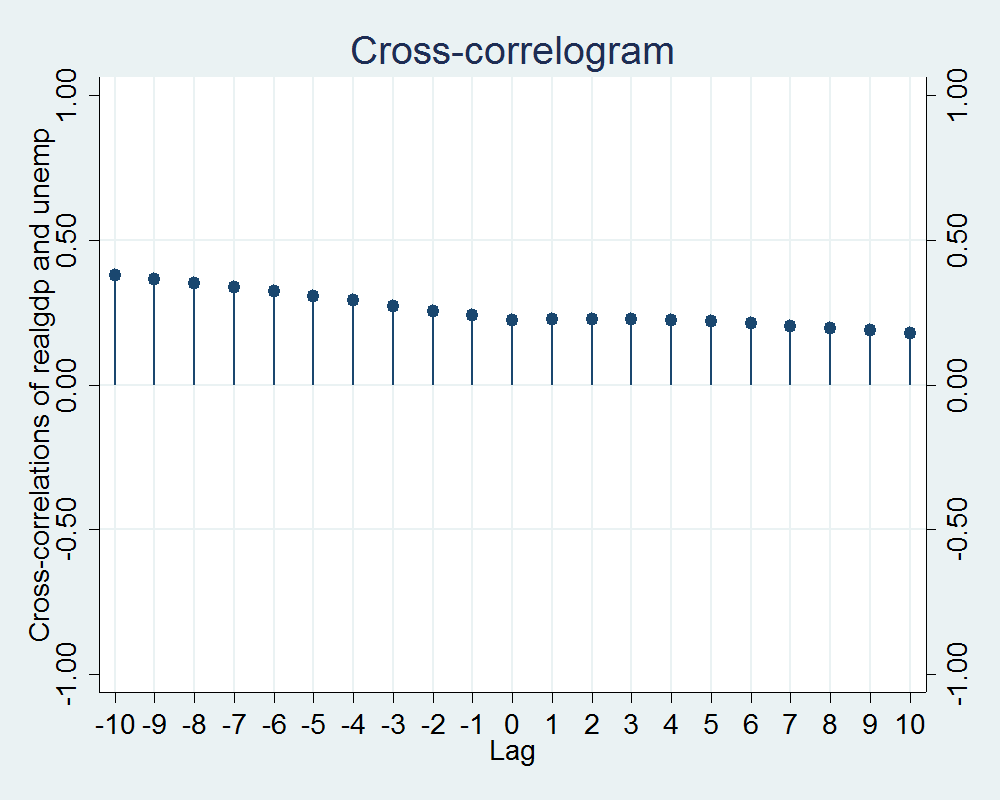

In [28]:
%%stata --graph
* CORR

xcorr realgdp unemp, lags(10) xlabel(-10(1)10,grid)


In [27]:
%%stata 
* CORR

xcorr realgdp unemp, lags(10) table


                 -1       0       1
 LAG      CORR   [Cross-correlation]
------------------------------------
-10      0.3780           |---     
-9       0.3650           |--      
-8       0.3513           |--      
-7       0.3367           |--      
-6       0.3221           |--      
-5       0.3067           |--      
-4       0.2903           |--      
-3       0.2728           |--      
-2       0.2553           |--      
-1       0.2390           |-       
0        0.2237           |-       
1        0.2263           |-       
2        0.2279           |-       
3        0.2266           |-       
4        0.2243           |-       
5        0.2190           |-       
6        0.2112           |-       
7        0.2036           |-       
8        0.1964           |-       
9        0.1873           |-       
10       0.1772           |-       



In [6]:
%%stata 
* trend and cyclical components
tsfilter hp realgdp_hp = realgdp , smooth(400) trend(realgdp_tr)
tsfilter hp unemp_hp = unemp , smooth(400) trend(unemp_tr)


In [30]:
%%stata 
* unit root test
dfuller unemp, lag(5)



Augmented Dickey-Fuller test for unit root         Number of obs   =       198

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -2.696            -3.477            -2.883            -2.573
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.0747



In [31]:
%%stata 
* unit root test

dfuller unemp_hp, lag(5)


Augmented Dickey-Fuller test for unit root         Number of obs   =       198

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -6.581            -3.477            -2.883            -2.573
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.0000



In [35]:
%%stata 
*help eststo
*help usefred
reg dp unemp
eststo model1

*help bgodfrey


      Source |       SS           df       MS      Number of obs   =       203
-------------+----------------------------------   F(1, 201)       =      0.52
       Model |  4.14581158         1  4.14581158   Prob > F        =    0.4731
    Residual |  1612.64586       201  8.02311373   R-squared       =    0.0026
-------------+----------------------------------   Adj R-squared   =   -0.0024
       Total |  1616.79167       202  8.00391917   Root MSE        =    2.8325

------------------------------------------------------------------------------
          dp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       unemp |  -.0907685   .1262705    -0.72   0.473    -.3397532    .1582162
       _cons |   .5177699   .7431564     0.70   0.487    -.9476131    1.983153
------------------------------------------------------------------------------



In [34]:
%%stata 
help eststo

In [36]:
%%stata 
*help eststo
*help usefred

estat bgodfrey,lag(1/3)
*help bgodfrey


Breusch-Godfrey LM test for autocorrelation
---------------------------------------------------------------------------
    lags(p)  |          chi2               df                 Prob > chi2
-------------+-------------------------------------------------------------
       1     |         33.346               1                   0.0000
       2     |         52.228               2                   0.0000
       3     |         56.294               3                   0.0000
---------------------------------------------------------------------------
                        H0: no serial correlation



(1 missing value generated)

                                          -1       0       1 -1       0       1
 LAG       AC       PAC      Q     Prob>Q  [Autocorrelation]  [Partial Autocor]
-------------------------------------------------------------------------------
1       -0.4043  -0.4059   33.682  0.0000       ---|               ---|        
2       -0.1132  -0.3441   36.335  0.0000          |                --|        
3        0.0816  -0.1910   37.721  0.0000          |                 -|        
4        0.1143   0.0344   40.451  0.0000          |                  |        
5       -0.1067   0.0379   42.844  0.0000          |                  |        
6       -0.0297   0.0143   43.031  0.0000          |                  |        
7       -0.0136  -0.0948    43.07  0.0000          |                  |        
8        0.0512  -0.0275   43.629  0.0000          |                  |        
9       -0.0212  -0.0303   43.726  0.0000          |                  |        
10      -0.

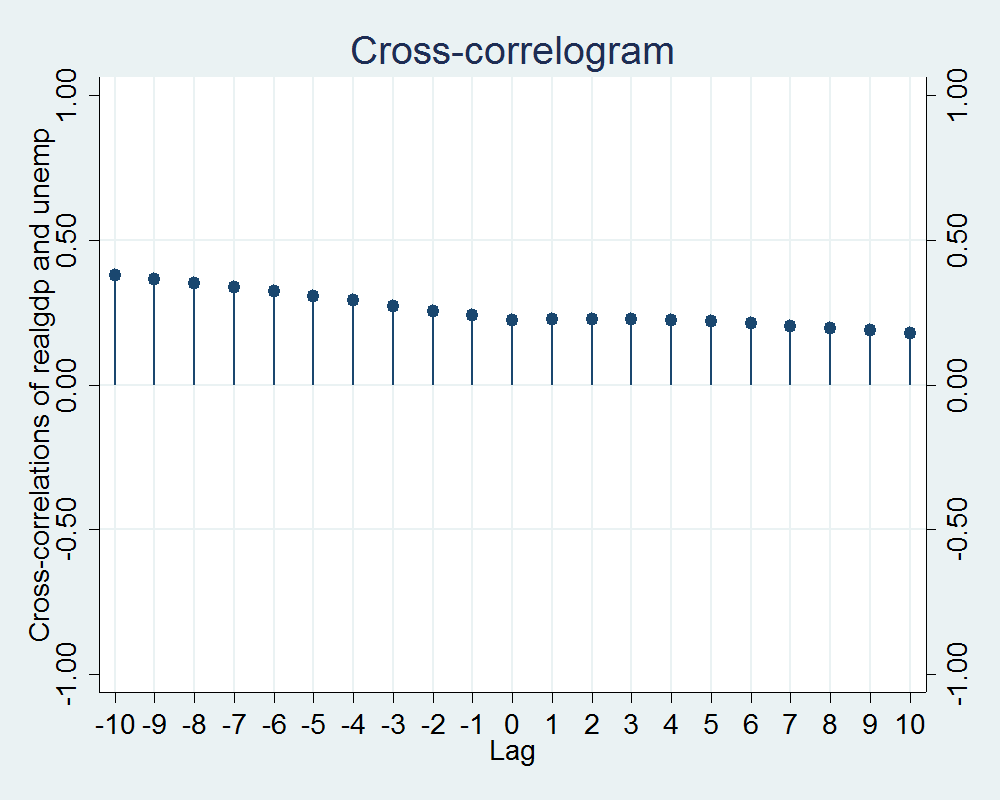

In [37]:
%%stata  --graph
predict new1res, residuals
corrgram new1res, lags(12)


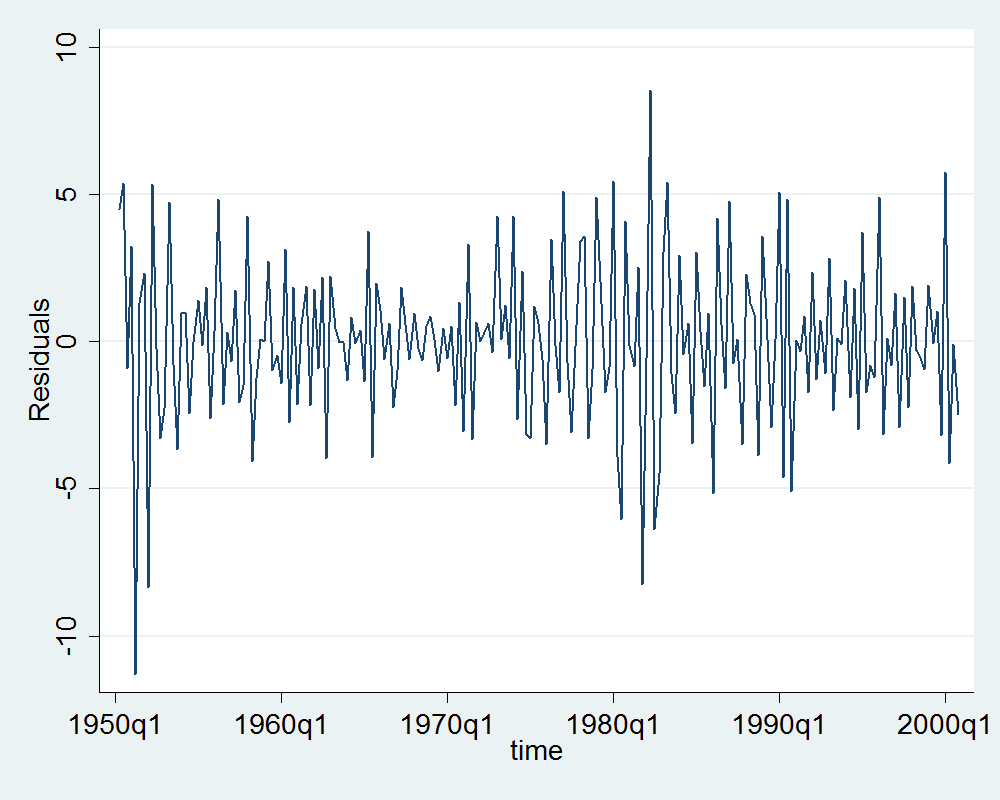

In [38]:
%%stata  --graph

twoway (line new1res time)

In [39]:
%%stata 
*or Then, reestimate the model using an AR(1) model for the disturbance process.
*Because the sample is large, the Prais Winsten and Cochrane Orcutt estimators
*should give essentially the same answer.


*Perform Cochrane-Orcutt AR(1) regression
prais dp unemp, corc
eststo


Iteration 0:  rho = 0.0000
Iteration 1:  rho = -0.4059
Iteration 2:  rho = -0.4059
Iteration 3:  rho = -0.4059

Cochrane-Orcutt AR(1) regression -- iterated estimates

      Source |       SS           df       MS      Number of obs   =       202
-------------+----------------------------------   F(1, 200)       =      1.21
       Model |  7.99949087         1  7.99949087   Prob > F        =    0.2736
    Residual |  1327.69352       200  6.63846759   R-squared       =    0.0060
-------------+----------------------------------   Adj R-squared   =    0.0010
       Total |  1335.69301       201  6.64523885   Root MSE        =    2.5765

------------------------------------------------------------------------------
          dp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       unemp |  -.0903301   .0822878    -1.10   0.274    -.2525931    .0719328
       _cons |   .5029782   .4843464    

In [40]:
%%stata 

*Perform Prais-Winsten AR(1) regression
prais dp unemp
eststo


Iteration 0:  rho = 0.0000
Iteration 1:  rho = -0.4059
Iteration 2:  rho = -0.4059
Iteration 3:  rho = -0.4059

Prais-Winsten AR(1) regression -- iterated estimates

      Source |       SS           df       MS      Number of obs   =       203
-------------+----------------------------------   F(1, 201)       =      1.20
       Model |  8.03998343         1  8.03998343   Prob > F        =    0.2743
    Residual |  1344.64701       201  6.68978613   R-squared       =    0.0059
-------------+----------------------------------   Adj R-squared   =    0.0010
       Total |    1352.687       202  6.69647028   Root MSE        =    2.5865

------------------------------------------------------------------------------
          dp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       unemp |  -.0906123   .0826036    -1.10   0.274     -.253493    .0722684
       _cons |   .5139948    .486157     1

In [41]:
%%stata 
*Same as above, but request robust standard errors
prais dp unemp, corc vce(robust)
eststo


Iteration 0:  rho = 0.0000
Iteration 1:  rho = -0.4059
Iteration 2:  rho = -0.4059
Iteration 3:  rho = -0.4059

Cochrane-Orcutt AR(1) regression -- iterated estimates

Linear regression                               Number of obs     =        202
                                                F(1, 200)         =       0.62
                                                Prob > F          =     0.4316
                                                R-squared         =     0.0060
                                                Root MSE          =     2.5765

------------------------------------------------------------------------------
             |             Semirobust
          dp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       unemp |  -.0903301   .1146289    -0.79   0.432    -.3163663    .1357061
       _cons |   .5029782   .6406704     0.79   0.433    -.7603573    1.766314
--

In [42]:
%%stata 
predict new3res, residuals

corrgram new3res, lags(12)

(1 missing value generated)

                                          -1       0       1 -1       0       1
 LAG       AC       PAC      Q     Prob>Q  [Autocorrelation]  [Partial Autocor]
-------------------------------------------------------------------------------
1       -0.4043  -0.4059   33.683  0.0000       ---|               ---|        
2       -0.1132  -0.3441   36.336  0.0000          |                --|        
3        0.0816  -0.1911   37.721  0.0000          |                 -|        
4        0.1143   0.0343   40.451  0.0000          |                  |        
5       -0.1067   0.0379   42.845  0.0000          |                  |        
6       -0.0297   0.0143   43.031  0.0000          |                  |        
7       -0.0136  -0.0949   43.071  0.0000          |                  |        
8        0.0512  -0.0276    43.63  0.0000          |                  |        
9       -0.0212  -0.0304   43.726  0.0000          |                  |        
10      -0.

In [57]:
%%stata 

*****************

* a regression model with ARMA disturbances

arima dp unemp,ar(1)
eststo
predict new2res, residuals
ereturn list


(setting optimization to BHHH)
Iteration 0:   log likelihood = -480.04191  
Iteration 1:   log likelihood = -480.03786  
Iteration 2:   log likelihood = -480.03753  
Iteration 3:   log likelihood = -480.03746  
Iteration 4:   log likelihood = -480.03745  

ARIMA regression

Sample:  1950q2 - 2000q4                        Number of obs     =        203
                                                Wald chi2(2)      =      49.86
Log likelihood = -480.0375                      Prob > chi2       =     0.0000

------------------------------------------------------------------------------
             |                 OPG
          dp |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
dp           |
       unemp |  -.0907105   .0632891    -1.43   0.152    -.2147549    .0333338
       _cons |   .5144039   .4077533     1.26   0.207    -.2847778    1.313586
-------------+---------------------------


                                          -1       0       1 -1       0       1
 LAG       AC       PAC      Q     Prob>Q  [Autocorrelation]  [Partial Autocor]
-------------------------------------------------------------------------------
1       -0.1327  -0.1332   3.6251  0.0569         -|                 -|        
2       -0.3173  -0.3479   24.469  0.0000        --|                --|        
3        0.1131  -0.0156   27.133  0.0000          |                  |        
4        0.1507   0.0547   31.879  0.0000          |-                 |        
5       -0.1097  -0.0119   34.409  0.0000          |                  |        
6       -0.0996  -0.0386   36.505  0.0000          |                  |        
7       -0.0079  -0.1084   36.519  0.0000          |                  |        
8        0.0556  -0.0116   37.178  0.0000          |                  |        
9       -0.0295  -0.0420   37.365  0.0000          |                  |        
10      -0.1281  -0.1302   40.903  0.00

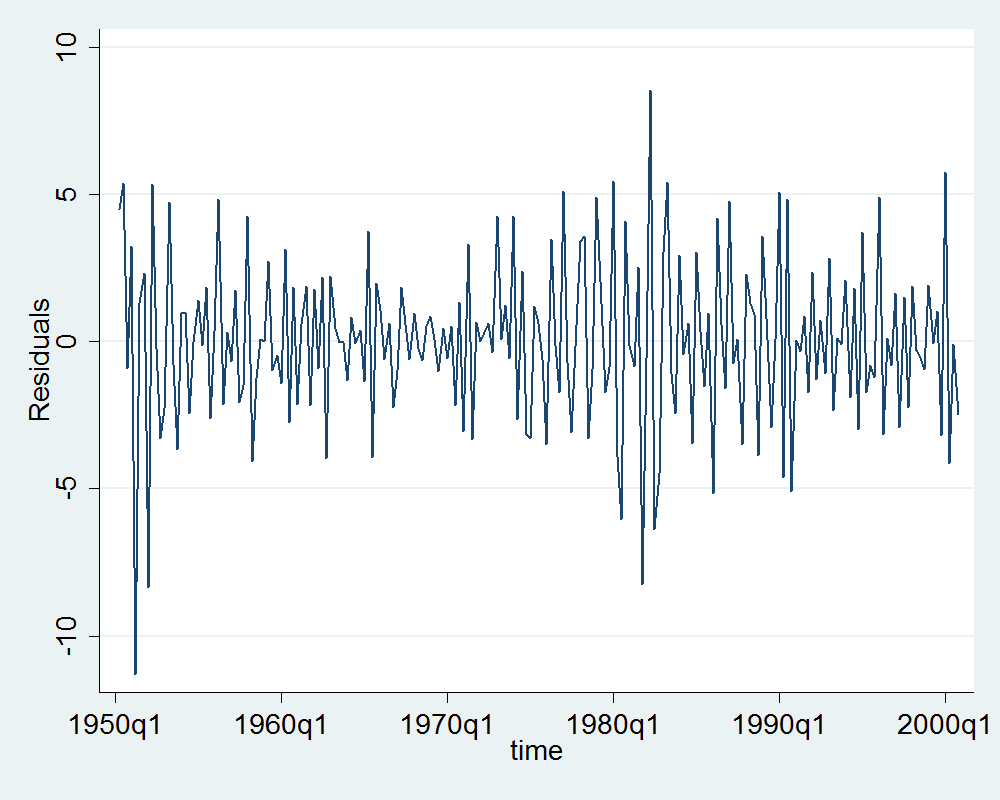

In [48]:
%%stata  --graph
corrgram new2res, lags(12)

In [49]:
%%stata
wntestq new2res


Portmanteau test for white noise
---------------------------------------
 Portmanteau (Q) statistic =   112.0550
 Prob > chi2(40)           =     0.0000



In [50]:
%%stata 
arima dp unemp,ar(3)
eststo
predict new21res, residuals


(setting optimization to BHHH)
Iteration 0:   log likelihood = -497.71028  
Iteration 1:   log likelihood = -497.69773  
Iteration 2:   log likelihood =  -497.6965  
Iteration 3:   log likelihood = -497.69633  
Iteration 4:   log likelihood = -497.69631  
(switching optimization to BFGS)
Iteration 5:   log likelihood =  -497.6963  

ARIMA regression

Sample:  1950q2 - 2000q4                        Number of obs     =        203
                                                Wald chi2(2)      =       3.57
Log likelihood = -497.6963                      Prob > chi2       =     0.1675

------------------------------------------------------------------------------
             |                 OPG
          dp |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
dp           |
       unemp |  -.0918826    .107793    -0.85   0.394     -.303153    .1193879
       _cons |   .5253069   .6801148     0

In [51]:
%%stata 
corrgram new21res, lags(12)

wntestq new21res


                                          -1       0       1 -1       0       1
 LAG       AC       PAC      Q     Prob>Q  [Autocorrelation]  [Partial Autocor]
-------------------------------------------------------------------------------
1       -0.4094  -0.4117   34.536  0.0000       ---|               ---|        
2       -0.0715  -0.3013   35.595  0.0000          |                --|        
3        0.0018  -0.2393   35.596  0.0000          |                 -|        
4        0.1500   0.0136   40.303  0.0000          |-                 |        
5       -0.1017   0.0156   42.475  0.0000          |                  |        
6       -0.0362  -0.0030   42.752  0.0000          |                  |        
7       -0.0188  -0.0821   42.828  0.0000          |                  |        
8        0.0688  -0.0058   43.839  0.0000          |                  |        
9       -0.0339  -0.0242   44.086  0.0000          |                  |        
10      -0.0451  -0.0672   44.524  0.00

In [55]:
%%stata 

*****************************

* fitting an improved Phillips curve model

gen newecon =0
replace newecon=1   if tin(1974q1,2000q4)
gen ddp = D.dp 
reg D.dp unemp newecon
eststo
reg ddp unemp newecon
eststo
estat bgodfrey
predict new41res, residuals


variable newecon already defined
r(110);

(0 real changes made)

variable ddp already defined
r(110);

      Source |       SS           df       MS      Number of obs   =       202
-------------+----------------------------------   F(2, 199)       =      0.03
       Model |  1.49634942         2  .748174711   Prob > F        =    0.9675
    Residual |  4502.65125       199  22.6263882   R-squared       =    0.0003
-------------+----------------------------------   Adj R-squared   =   -0.0097
       Total |   4504.1476       201  22.4086945   Root MSE        =    4.7567

------------------------------------------------------------------------------
        D.dp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       unemp |   .0639962   .2545837     0.25   0.802    -.4380318    .5660243
     newecon |  -.0756572   .8055602    -0.09   0.925    -1.664187    1.512873
       _cons |  -.3562757  


                                          -1       0       1 -1       0       1
 LAG       AC       PAC      Q     Prob>Q  [Autocorrelation]  [Partial Autocor]
-------------------------------------------------------------------------------
1       -0.6068  -0.6074   75.479  0.0000      ----|              ----|        
2        0.0374  -0.5234   75.767  0.0000          |              ----|        
3        0.0600  -0.4998   76.512  0.0000          |               ---|        
4        0.1008  -0.2862   78.625  0.0000          |                --|        
5       -0.1173  -0.1862   81.503  0.0000          |                 -|        
6        0.0207  -0.0522   81.593  0.0000          |                  |        
7       -0.0059  -0.1023     81.6  0.0000          |                  |        
8        0.0340  -0.0723   81.845  0.0000          |                  |        
9       -0.0108  -0.0282    81.87  0.0000          |                  |        
10       0.0113   0.0908   81.898  0.00

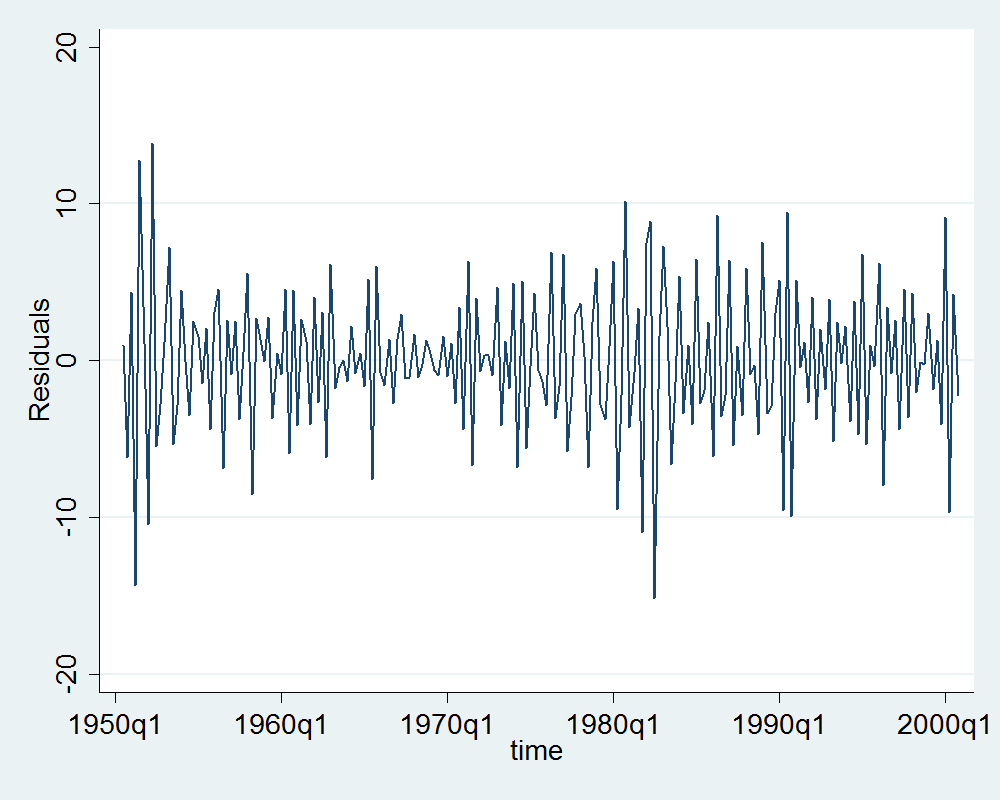

In [54]:
%%stata  --graph

*****************************

corrgram new41res, lags(12)
twoway (line new41res time)

In [56]:
%%stata 
*************************
* Chapter 22 application 1

gen logcons=ln(realcons)
gen loggdp=ln(realgdp)

reg logcons L(1/2).logcons loggdp
eststo
ereturn list
estat bgodfrey
estat bgodfrey,lag(1/3)
*help bgodfrey


      Source |       SS           df       MS      Number of obs   =       202
-------------+----------------------------------   F(3, 198)       >  99999.00
       Model |  52.3158723         3  17.4386241   Prob > F        =    0.0000
    Residual |  .013469386       198  .000068027   R-squared       =    0.9997
-------------+----------------------------------   Adj R-squared   =    0.9997
       Total |  52.3293417       201  .260344983   Root MSE        =    .00825

------------------------------------------------------------------------------
     logcons |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     logcons |
         L1. |   .8015494   .0760661    10.54   0.000     .6515456    .9515532
         L2. |  -.0045974   .0656572    -0.07   0.944    -.1340746    .1248798
             |
      loggdp |   .2146189   .0370249     5.80   0.000      .141605    .2876327
       _cons |  -.17

In [61]:
%%stata 
*estat hettest


predict new5res, residuals

reg new5res L(1/3).new5res
ereturn list
scalar lmts=e(r2)*e(N)
di lmts



variable new5res already defined
r(110);

      Source |       SS           df       MS      Number of obs   =       200
-------------+----------------------------------   F(3, 196)       =     13.02
       Model |  211.714005         3  70.5713349   Prob > F        =    0.0000
    Residual |  1061.99947       196  5.41836463   R-squared       =    0.1662
-------------+----------------------------------   Adj R-squared   =    0.1535
       Total |  1273.71347       199  6.40057022   Root MSE        =    2.3277

------------------------------------------------------------------------------
     new5res |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     new5res |
         L1. |  -.2421753    .071134    -3.40   0.001    -.3824615    -.101889
         L2. |  -.3705734   .0665093    -5.57   0.000    -.5017392   -.2394076
         L3. |  -.0155602   .0690774    -0.23   0.822    -.1517907    .12

In [62]:
%%stata
di e(r2)



In [63]:
%%stata

scalar beta=0.07869
scalar betabar=0.07869/(1-0.968-(-0.047))
di beta



In [64]:
%%stata
di betabar


In [59]:
%%stata
esttab, r2 ar2 se scalar(rmse)


---------------------------------------------------------------------------------------------------------
                      (1)             (2)             (3)             (4)             (5)             (6)
                       dp              dp              dp              dp              dp              dp
---------------------------------------------------------------------------------------------------------
main                                                                                                     
unemp             -0.0908         -0.0903         -0.0906         -0.0903         -0.0907         -0.0907
                  (0.126)        (0.0823)        (0.0826)         (0.115)        (0.0633)        (0.0633)
newecon                                                                                                  
                                                                                                         
L.logcons                                    


Vector autoregression

Sample:  1950q4 - 2000q4                        Number of obs     =        201
Log likelihood =   1410.779                     AIC               =  -13.89829
FPE            =   3.16e-09                     HQIC              =  -13.80519
Det(Sigma_ml)  =   2.75e-09                     SBIC              =  -13.66821

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
logcons               7     .007926   0.9998   850616.7   0.0000
loggdp                7     .008717   0.9997   625053.9   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
logcons      |
     logcons |
         L1. |   .9270888   .0827353    11.21   0.000     .7649306

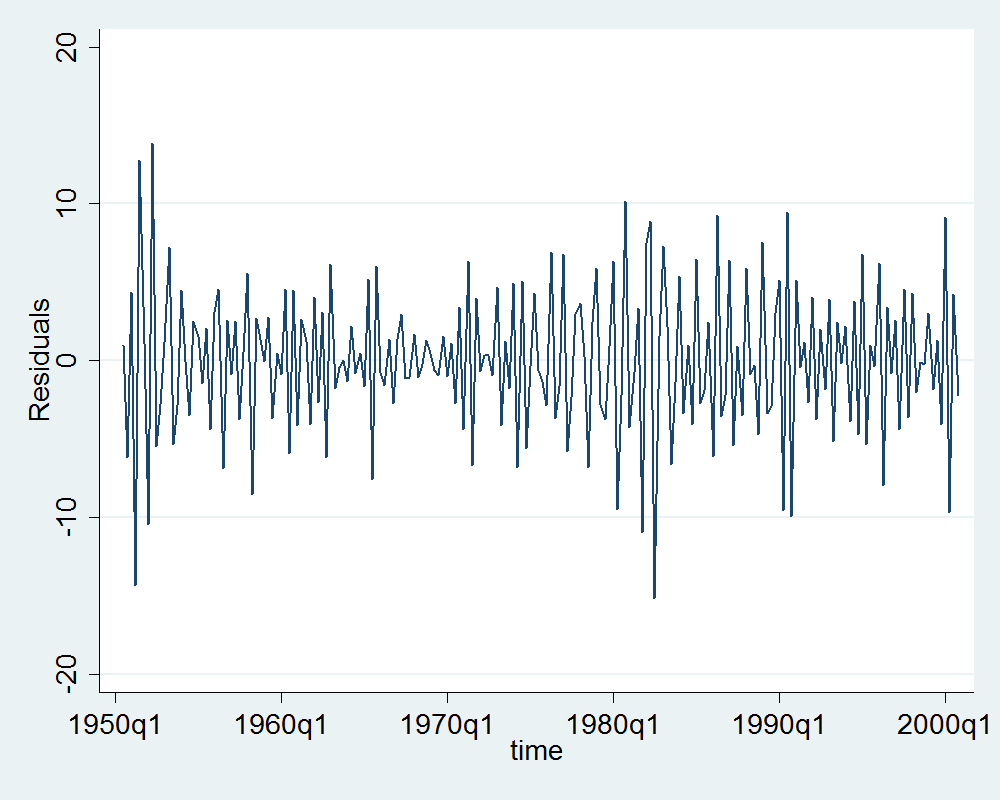

In [65]:
%%stata  --graph
*********************

varbasic logcons loggdp,lags(1/3)






Vector autoregression

Sample:  1950q3 - 2000q4                        Number of obs     =        202
Log likelihood =   1397.434                     AIC               =  -13.73697
FPE            =   3.71e-09                     HQIC              =   -13.6707
Det(Sigma_ml)  =   3.36e-09                     SBIC              =  -13.57319

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
logcons               5     .008628   0.9997   720522.7   0.0000
loggdp                5      .00886   0.9997   608692.5   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
logcons      |
     logcons |
         L1. |   .8365359   .0870374     9.61   0.000     .6659457

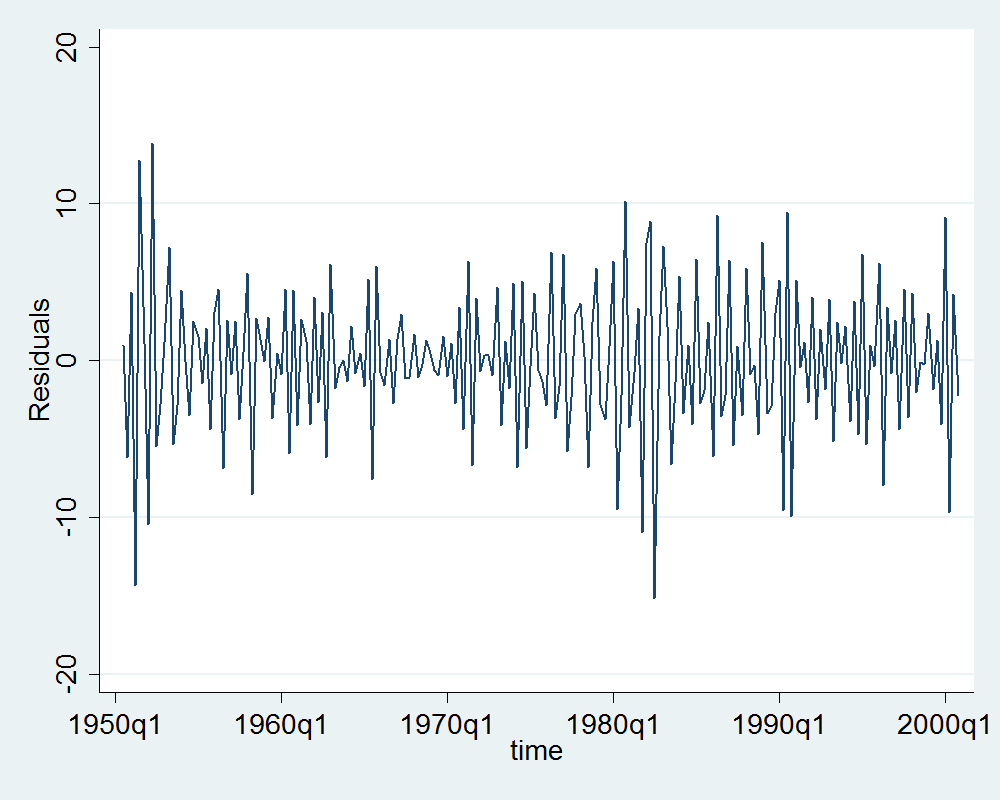

In [66]:
%%stata --graph
**********
var logcons loggdp


irf create order1, step(10) set(myirf3)


no irf file active
r(198);



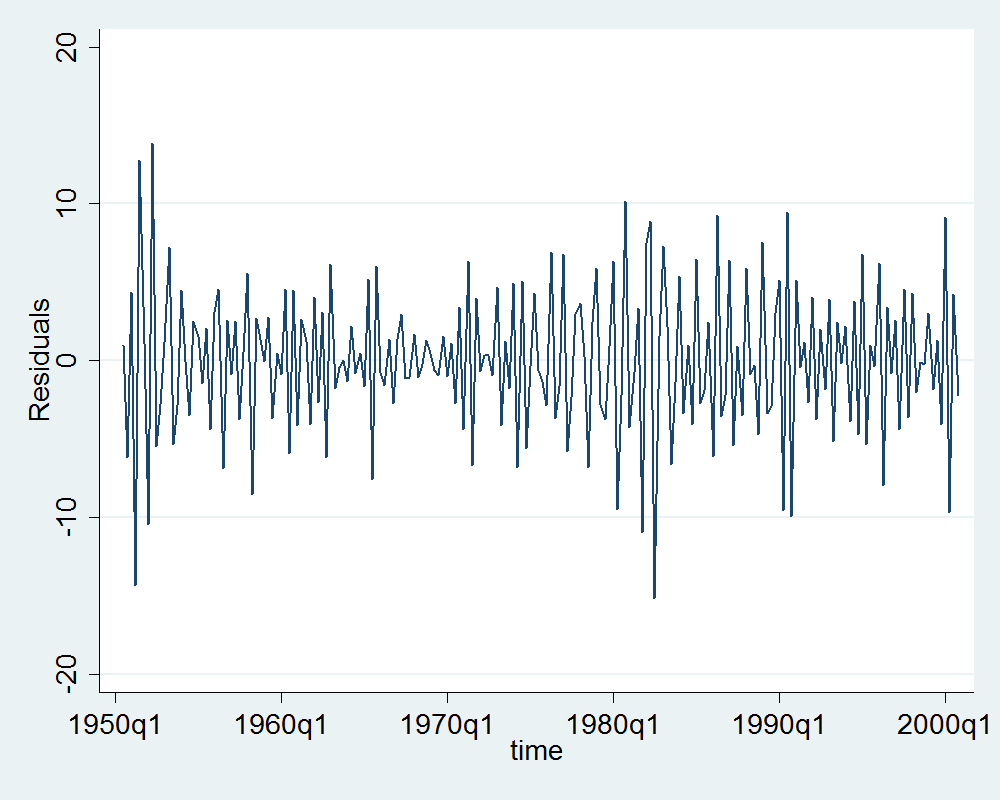

In [67]:
%%stata --graph
**********
irf graph oirf, impulse(loggdp) response(logcons)

In [68]:
%%stata 
**********

****************************



*findit estout

return list

capture drop ehat
predict double ehat , resid


(2 missing values generated)



In [7]:
%%stata 
freduse UNRATE
summarize


(841 observations read)

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        date |          0
      UNRATE |        841    5.787753     1.63486        2.5       10.8
       daten |        841    8400.434     7393.88      -4383      21185


In [ ]:
%%stata 

In [4]:
from IPython.core.display import HTML, Image
css_file = '../../../../custom.css'
HTML(open(css_file, 'r').read())